In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite 
# I wasn't able to use engine = create_engine(f"sqlite:///hawaii.sqlite") 
# because it just doesn't work on my computer so this is the solution my TA came up with
engine = create_engine("sqlite:///C:/Users/marti/OneDrive/Desktop/School/SMU-VIRT-DATA-PT-12-2023-U-LOLC/sql_alchemy-challenge/Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurements = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
Session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = Session.query(func.max(Measurements.date)).one()

most_recent_date

('2017-08-23',)

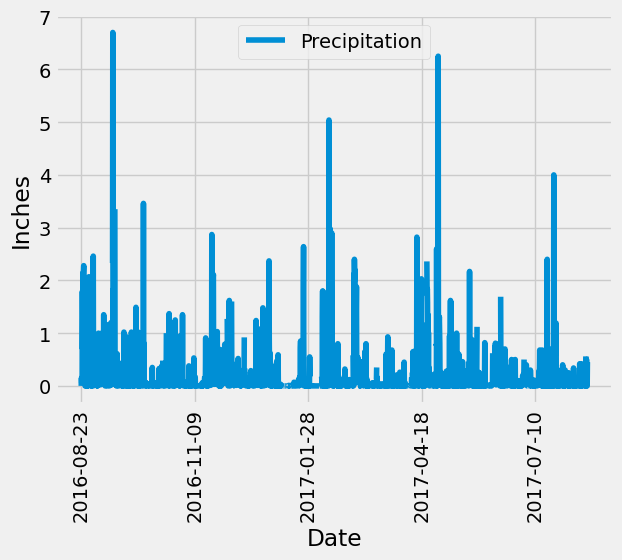

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in the dataset.
most_recent_date = Session.query(func.max(Measurements.date)).scalar()
one_year_ago = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation
precipitation_data = Session.query(Measurements.date, Measurements.prcp)\
    .filter(Measurements.date >= one_year_ago)\
    .order_by(Measurements.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names.
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the DataFrame by date.
precipitation_df = precipitation_df.sort_values(by='Date')

# Plotting the data using Pandas and Matplotlib.
precipitation_df.plot(x='Date', y='Precipitation')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90)
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = precipitation_df['Precipitation'].describe()
summary_df = pd.DataFrame(summary_statistics)
summary_df

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
total_stations = Session.query(func.count(Station.station)).all()
total_stations

[(9,)]

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = Session.query(Measurements.station, func.count(Measurements.station))\
    .group_by(Measurements.station)\
    .order_by(func.count(Measurements.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = most_active_stations[0][0]

# Query to calculate the lowest, highest, and average temperature for the most active station
temperature_stats = Session.query(func.min(Measurements.tobs), func.max(Measurements.tobs), func.avg(Measurements.tobs))\
    .filter(Measurements.station == most_active_station_id)\
    .all()

temperature_stats


[(54.0, 85.0, 71.66378066378067)]

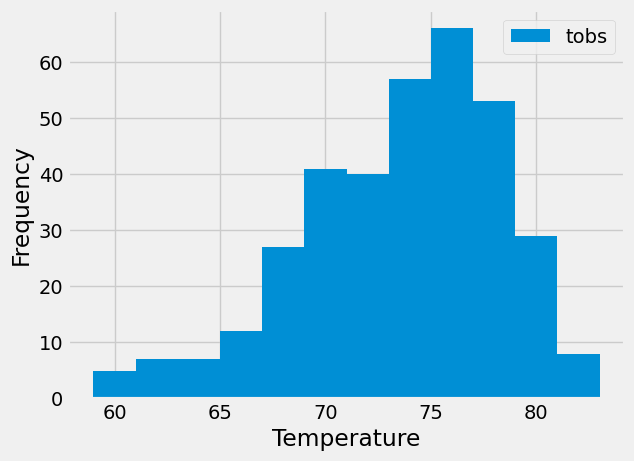

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = Session.query(Measurements.date, Measurements.tobs)\
    .filter(Measurements.station == most_active_station_id)\
    .filter(Measurements.date >= one_year_ago)\
    .all()

#create a Pandas DataFrame directly from the query results
temperature_df = pd.DataFrame(temperature_data, columns=['Date', 'Temperature'])

# Plot Histogram
plt.hist(temperature_df['Temperature'], label='tobs', bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()




# Close Session

In [19]:
# Close Session
Session.close()